# News Articles Categorisation google news


The steps to build the model are

- Data Exploration
- Text Processing (Cleaning)
- Feature Extraction
- Modelling
- Use the Model

In this notebook, we will be documenting our project codes for our industry sponsor, Food Security Exchange (FSX). This will be written in python, with supplementary comments at each step to ensure that users can both comprehend and trust the results and output generated by the algorithms.

Our project mines trigger events related news articles from various sources, before classifying them according to predefined supply chain disruption categories using both a rule-based and ML-based approach. Following this, a predictive risk score is assigned to every article.

# Possible Reference


- https://www.analyticsvidhya.com/blog/2021/08/malawi-news-classification-an-nlp-project/

# Importing Libraries

In [1]:
import nltk

# nltk.download()


In [2]:
# Import libraries

import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.metrics  import classification_report
from sklearn import metrics
import time



# Combining multiple excel files into one dataframe


In [3]:
import os
import pandas as pd
cwd = os.path.abspath('CSV data for Classifier google news test') 
files = os.listdir(cwd) 

In [4]:
cwd

'C:\\Users\\Shawn\\FSX\\News Classifier\\CSV data for Classifier google news test'

In [5]:
files

['avalanche_googleNews.csv',
 'contamination_googleNews.csv',
 'covid19_googleNews.csv',
 'cyberattack_googleNews.csv',
 'cyclone_googleNews.csv',
 'dengue_googleNews.csv',
 'drought_googleNews.csv',
 'earthquake_googleNews.csv',
 'ebola_googleNews.csv',
 'economic crisis_googleNews.csv',
 'floods_googleNews.csv',
 'heat stress_googleNews.csv',
 'Influenza_googleNews.csv',
 'limnic eruption_googleNews.csv',
 'locust_googleNews.csv',
 'nuclear_googleNews.csv',
 'oil spills_googleNews.csv',
 'pandemic_googleNews.csv',
 'SarS_googleNews.csv',
 'sinkhole_googleNews.csv',
 'supply chain_googleNews.csv',
 'terror_googleNews.csv',
 'tradedispute_googleNews.csv',
 'tsunami_googleNews.csv',
 'Unsafe_googleNews.csv',
 'volcanic eruption_googleNews.csv',
 'war_googleNews.csv']

In [6]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
         df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True) 
df.head()

# ['geophysical event',
#  'idiosyncratic',
#  'cyberattack',
#  'Acute climatological event (cyclone)',
#  'pandemic',
#  'Acute climatological event (droughts)',
#  'Economic Crisis',
#  'Acute climatological event (flood)',
#  'Acute climatological event (heat stress)',
#  'Man-Made Disaster',
#  'Terrorism',
#  'Trade Dispute',
#  'Military Conflicts']

,Unnamed: 0,date,news title,news source(url),content summary,keywords,class_name,new_class_name,full Article
0,0,2021-02-08 00:00:00,How to avoid avalanches and what to do if you'...,https://www.cnn.com/2021/02/08/weather/how-to-...,(CNN) It has been a deadly week in the US from...,"avalanches, travels, utahworldwide, avoid, wor...",avalanche,geophysical event,(CNN) It has been a deadly week in the US from...
1,1,2021-02-07 00:00:00,4 skiers killed in Utah avalanche were ‘living...,https://www.deseret.com/utah/2021/2/7/22271152...,MILLCREEK — Friends and family of the four you...,"utah, moughamian, mountain, killed, life, aval...",avalanche,geophysical event,MILLCREEK — Friends and family of the four you...
2,2,2021-02-06 00:00:00,"Four dead in Mill Creek Canyon avalanche, matc...",https://www.sltrib.com/news/2021/02/06/four-de...,She said a group of three people were from Mil...,"center, canyon, utah, skiers, died, state, cre...",avalanche,geophysical event,(Francisco Kjolseth | The Salt Lake Tribune) S...
3,3,2021-02-20 22:33:24+00:00,NHL suspends rest of Golden Knights-Avalanche ...,https://milehighsports.com/nhl-suspends-rest-o...,The NHL has suspended the final two periods of...,"ice, suspends, seconds, poor, nbc, nhl, lake, ...",avalanche,geophysical event,The NHL has suspended the final two periods of...
4,4,2021-02-21 00:00:00,Colorado Avalanche finally beat Golden Knights...,https://www.milehighhockey.com/2021/2/21/22293...,After splitting the first two games of their s...,"outdoor, ice, golden, avalanche, vegas, mackin...",avalanche,geophysical event,After splitting the first two games of their s...


In [7]:
df.shape

(1350, 9)

In [8]:
df['new_class_name'].value_counts()

pandemic                                    243
geophysical event                           184
idiosyncratic                               170
Man-Made Disaster                           163
Acute climatological event (heat stress)    114
Trade Dispute                                59
Acute climatological event (cyclone)         59
Military Conflicts                           59
Economic Crisis                              59
Terrorism                                    58
Acute climatological event (flood)           54
Acute climatological event (droughts)        39
cyberattack                                  39
Name: new_class_name, dtype: int64

# Data Exploration

In [9]:
category = list(df['new_class_name'].unique())
category

['geophysical event',
 'Man-Made Disaster',
 'pandemic',
 'cyberattack',
 'Acute climatological event (cyclone)',
 'idiosyncratic',
 'Acute climatological event (droughts)',
 'Economic Crisis',
 'Acute climatological event (flood)',
 'Acute climatological event (heat stress)',
 nan,
 'Terrorism',
 'Trade Dispute',
 'Military Conflicts']

In [10]:
filtered_df = df[df['new_class_name'] == 'cyberattack']

In [11]:
filtered_df.head()

,Unnamed: 0,date,news title,news source(url),content summary,keywords,class_name,new_class_name,full Article
104,0,2021-01-15 01:57:24+00:00,New Zealand central bank governor apologises a...,https://www.reuters.com/article/us-newzealand-...,(Reuters) - The head of the Reserve Bank of Ne...,"cyberattack, bank, service, apologises, breach...",cyberattack,cyberattack,(Reuters) - The head of the Reserve Bank of Ne...
105,1,2021-01-15 20:20:15,SolarWinds Close to Figuring Out How Cyberatta...,https://www.govtech.com/security/solarwinds-cl...,SolarWinds also said the attack might have con...,"close, companies, cyberattack, customers, brea...",cyberattack,cyberattack,"(TNS) — Austin-based SolarWinds, the software ..."
106,2,2021-01-15 20:20:15,Global Crane Manufacturer Palfinger Suffers Cy...,https://www.industryweek.com/technology-and-ii...,Leading crane and lifting manufacturer Palfing...,"systems, cyberattack, global, networks, palfin...",cyberattack,cyberattack,If there is anything manufacturers can learn f...
107,3,2021-01-15 20:20:15,"Delaware County paid $25,000 in ransom during ...",https://whyy.org/articles/delaware-county-paid...,The perpetrator responsible for the fall cyber...,"cyberattack, email, network, 25000, ransom, ma...",cyberattack,cyberattack,The perpetrator responsible for the fall cyber...
108,4,2021-01-19 00:00:00,What Businesses Are The Most Vulnerable To Cyb...,https://www.forbes.com/sites/theyec/2021/01/19...,"For businesses, supporting social distancing h...","organizations, cybersecurity, ransomware, vuln...",cyberattack,cyberattack,"By Dmitry Dontov, CEO and founder of Spin Tech..."


# Text Preprocessing

- One way to improve on this could be to remove "said" or irrelevant words to clean the text more explicity

In [12]:
def preprocess(text):
    
    """
    Function: split text into words and return the root form of the words
    Args:
      text(str): the article
    Return:
      lem(list of str): a list of the root form of the article words
    """
        
    # Normalize text
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    
    # Tokenize text
    token = word_tokenize(text)
    
    # Remove stop words
    stop = stopwords.words("english")
    new_stop_words_list = ['said', 'us', 'also', 'mr']
    stop.extend(new_stop_words_list)
    words = [t for t in token if t not in stop]
    
    # Lemmatization
    lem = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    return lem

In [13]:
df["Preprocessed_Text"] = df['content summary'].apply(lambda x: preprocess(x))
df.head(10)

,Unnamed: 0,date,news title,news source(url),content summary,keywords,class_name,new_class_name,full Article,Preprocessed_Text
0,0,2021-02-08 00:00:00,How to avoid avalanches and what to do if you'...,https://www.cnn.com/2021/02/08/weather/how-to-...,(CNN) It has been a deadly week in the US from...,"avalanches, travels, utahworldwide, avoid, wor...",avalanche,geophysical event,(CNN) It has been a deadly week in the US from...,"[cnn, deadly, week, avalanche, worldwide, aver..."
1,1,2021-02-07 00:00:00,4 skiers killed in Utah avalanche were ‘living...,https://www.deseret.com/utah/2021/2/7/22271152...,MILLCREEK — Friends and family of the four you...,"utah, moughamian, mountain, killed, life, aval...",avalanche,geophysical event,MILLCREEK — Friends and family of the four you...,"[millcreek, friend, family, four, young, skier..."
2,2,2021-02-06 00:00:00,"Four dead in Mill Creek Canyon avalanche, matc...",https://www.sltrib.com/news/2021/02/06/four-de...,She said a group of three people were from Mil...,"center, canyon, utah, skiers, died, state, cre...",avalanche,geophysical event,(Francisco Kjolseth | The Salt Lake Tribune) S...,"[group, three, people, mill, creek, canyon, gr..."
3,3,2021-02-20 22:33:24+00:00,NHL suspends rest of Golden Knights-Avalanche ...,https://milehighsports.com/nhl-suspends-rest-o...,The NHL has suspended the final two periods of...,"ice, suspends, seconds, poor, nbc, nhl, lake, ...",avalanche,geophysical event,The NHL has suspended the final two periods of...,"[nhl, suspended, final, two, period, avalanche..."
4,4,2021-02-21 00:00:00,Colorado Avalanche finally beat Golden Knights...,https://www.milehighhockey.com/2021/2/21/22293...,After splitting the first two games of their s...,"outdoor, ice, golden, avalanche, vegas, mackin...",avalanche,geophysical event,After splitting the first two games of their s...,"[splitting, first, two, game, series, vega, go..."
5,5,2021-02-21 00:00:00,Avalanche beat Golden Knights in unforgettable...,https://nhl.nbcsports.com/2021/02/21/avalanche...,"Saturday’s (and you might also say, Sunday’s) ...","outdoor, golden, avalanche, lake, unforgettabl...",avalanche,geophysical event,Click to email this to a friend (Opens in new ...,"[saturday, might, say, sunday, golden, knight,..."
6,6,2021-02-03 19:06:08+00:00,"Three Eagle County, Colorado, Residents Confir...",https://backcountrymagazine.com/stories/three-...,While the Vail Daily has confirmed the names o...,"ophir, eagle, residents, search, pass, avalanc...",avalanche,geophysical event,“The red line marks descent and the blue lines...,"[vail, daily, confirmed, name, skier, paper, w..."
7,7,2021-02-03 19:06:08+00:00,2 killed in separate avalanches in Colorado,https://abcnews.go.com/US/killed-separate-aval...,Two people have died in separate avalanches in...,"avalanches, killed, according, separate, avala...",avalanche,geophysical event,Twenty-five people in the U.S. have died from ...,"[two, people, died, separate, avalanche, color..."
8,8,2021-02-18 19:20:29+00:00,"In Utah, 2021 Has Become the Year of the Avala...",https://www.saltlakemagazine.com/in-utah-2021-...,The Utah Avalanche Center has even taking a ce...,"avalanches, utah, 2021, avalanche, accidents, ...",avalanche,geophysical event,"To most skiers and snowboarders, avalanches ar...","[utah, avalanche, center, even, taking, centra..."
9,9,2021-02-21 14:14:07,Avalanche danger prompts precautionary road cl...,https://www.seattletimes.com/seattle-news/aval...,"On Monday, Feb. 22, the Washington State Depar...","snoqualmie, state, mountain, including, steven...",avalanche,geophysical event,Editor’s note: This story was published Sunday...,"[monday, feb, washington, state, department, t..."


# Text Exploration

In [14]:
def find_common_words(df, category):
        
    """
    Function: find the most frequent words in the category and return the them
    Args:
      df(dataframe): the dataframe of articles
      category(str): the category name
    Return:
      the most frequant words in the category
    """
        
    # Create dataframes for the category
    cat_df = df[df["new_class_name"]==category]
    
    # Initialize words list for the category
    words = [word for tokens in cat_df["Preprocessed_Text"] for word in tokens]
    
    # Count words frequency
    words_counter = Counter(words)
 
    return words_counter.most_common(10)

In [15]:
print("Most common words in each category")
for c in category:
    print(c, " News")
    print(find_common_words(df, c))
    print()

Most common words in each category
geophysical event  News
[('tsunami', 175), ('earthquake', 150), ('sinkhole', 135), ('avalanche', 113), ('people', 67), ('magnitude', 62), ('japan', 59), ('area', 56), ('warning', 56), ('road', 54)]

Man-Made Disaster  News
[('oil', 211), ('nuclear', 179), ('spill', 115), ('iran', 108), ('water', 76), ('u', 58), ('contamination', 57), ('state', 55), ('deal', 49), ('year', 40)]

pandemic  News
[('covid', 214), ('vaccine', 212), ('health', 208), ('ebola', 185), ('virus', 165), ('flu', 160), ('pandemic', 154), ('sars', 154), ('outbreak', 151), ('cov', 145)]

cyberattack  News
[('attack', 55), ('cybersecurity', 31), ('cyberattack', 30), ('data', 29), ('cyber', 26), ('company', 26), ('system', 24), ('ransomware', 24), ('information', 20), ('hacker', 18)]

Acute climatological event (cyclone)  News
[('cyclone', 174), ('tropical', 110), ('people', 36), ('north', 35), ('mozambique', 34), ('storm', 34), ('coast', 33), ('queensland', 32), ('wind', 28), ('eloise'

In [16]:
df['Preprocessed_Text2'] = df['Preprocessed_Text'].apply(' '.join)
df.head()

,Unnamed: 0,date,news title,news source(url),content summary,keywords,class_name,new_class_name,full Article,Preprocessed_Text,Preprocessed_Text2
0,0,2021-02-08 00:00:00,How to avoid avalanches and what to do if you'...,https://www.cnn.com/2021/02/08/weather/how-to-...,(CNN) It has been a deadly week in the US from...,"avalanches, travels, utahworldwide, avoid, wor...",avalanche,geophysical event,(CNN) It has been a deadly week in the US from...,"[cnn, deadly, week, avalanche, worldwide, aver...",cnn deadly week avalanche worldwide average pe...
1,1,2021-02-07 00:00:00,4 skiers killed in Utah avalanche were ‘living...,https://www.deseret.com/utah/2021/2/7/22271152...,MILLCREEK — Friends and family of the four you...,"utah, moughamian, mountain, killed, life, aval...",avalanche,geophysical event,MILLCREEK — Friends and family of the four you...,"[millcreek, friend, family, four, young, skier...",millcreek friend family four young skier kille...
2,2,2021-02-06 00:00:00,"Four dead in Mill Creek Canyon avalanche, matc...",https://www.sltrib.com/news/2021/02/06/four-de...,She said a group of three people were from Mil...,"center, canyon, utah, skiers, died, state, cre...",avalanche,geophysical event,(Francisco Kjolseth | The Salt Lake Tribune) S...,"[group, three, people, mill, creek, canyon, gr...",group three people mill creek canyon group fiv...
3,3,2021-02-20 22:33:24+00:00,NHL suspends rest of Golden Knights-Avalanche ...,https://milehighsports.com/nhl-suspends-rest-o...,The NHL has suspended the final two periods of...,"ice, suspends, seconds, poor, nbc, nhl, lake, ...",avalanche,geophysical event,The NHL has suspended the final two periods of...,"[nhl, suspended, final, two, period, avalanche...",nhl suspended final two period avalanche golde...
4,4,2021-02-21 00:00:00,Colorado Avalanche finally beat Golden Knights...,https://www.milehighhockey.com/2021/2/21/22293...,After splitting the first two games of their s...,"outdoor, ice, golden, avalanche, vegas, mackin...",avalanche,geophysical event,After splitting the first two games of their s...,"[splitting, first, two, game, series, vega, go...",splitting first two game series vega golden kn...


In [23]:
df = df.dropna()

In [24]:
X = df['Preprocessed_Text2']
y = df['new_class_name']

# Feature Extraction

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
tf_vec = TfidfVectorizer()
train_features = tf_vec.fit(X_train)
train_features = tf_vec.transform(X_train)
test_features = tf_vec.transform(X_test)

# Modelling

In [27]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of the model training time and classification report
    """
    results ={}
    
    # Start time
    start = time.time()
    # Train the model
    model.fit(train_features, y_train)
    # End time
    end = time.time()
    # Calculate the training time
    results['train_time'] = end - start
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report
    results['classification_report'] = classification_report(y_test, test_predicted)
        
    return results

In [28]:
sv = svm.SVC()
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
xgb = xgboost.XGBClassifier(random_state = 1)
tree = DecisionTreeClassifier()
nb = MultinomialNB()


# Fit and evaluate models
results = {}
for cls in [sv, ab, gb, xgb, tree, nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, train_features, y_train, test_features, y_test)

C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shawn\anaconda3\lib\site-packages\xgboost\skle

[02:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
for res in results:
    print (res)
    print()
    for i in results[res]:
        print (i, ':')
        print(results[res][i])
        print()
    print ('-----')
    print()

SVC

train_time :
0.8550310134887695

classification_report :
                                          precision    recall  f1-score   support

    Acute climatological event (cyclone)       0.89      0.67      0.76        12
   Acute climatological event (droughts)       1.00      0.50      0.67         6
      Acute climatological event (flood)       1.00      0.22      0.36         9
Acute climatological event (heat stress)       1.00      0.76      0.86        21
                         Economic Crisis       0.50      0.22      0.31         9
                       Man-Made Disaster       0.85      0.85      0.85        34
                      Military Conflicts       1.00      0.75      0.86        12
                               Terrorism       1.00      0.18      0.31        11
                           Trade Dispute       1.00      0.38      0.56        13
                             cyberattack       1.00      0.29      0.44         7
                       geophysical 

In [30]:
new_category = ["Acute climatological event (cyclone)", "Acute climatological event (droughts)", "Acute climatological event (flood)", "Acute climatological event (heat stress)", "Economic Crisis", "Man-Made Disaster",
                "Military Conflicts", "Terrorism" , "Trade Dispute", "cyberattack", "geophysical event", "idiosyncratic", "pandemic"]


# Using the model to predict new articles

### Creating a function
A threshold value of 0.56 is used in the below function to determine if an event (i.e. the input) is related and therefore should be classified as a trigger event. Specific methodology in deriving the threshold value can be found in the [here](./Derivation%20of%20Threshold%20Value.ipynb).

In [31]:
def classify_article(path):
    
    """
    Function: classify an article.
    Args:
      path: the path of the article 
    Return:
      category (str): the category of the article
    """
    # Read file
    file = open(path, 'r')
    artcl = file.read()

    # Text preprocessing
    artcl = preprocess(artcl)
    artcl = ' '.join(artcl)

    # Use TF_IDF
    test = tf_vec.transform([artcl])

    # Use GradientBoosting model to classify the article
    predict = gb.predict(test)
    predict_score = gb.predict_proba(test)
    sorted_predict_score = sorted(predict_score.tolist()[0], reverse=True)
    if (sorted_predict_score[0] < 0.56) :
        category = "Not related"
    else:
        category = predict[0]

    # Close file
    file.close()

    return category, predict_score[0]

In [32]:
print(classify_article('art1.txt'))

('Man-Made Disaster', array([7.41571840e-05, 4.52055943e-04, 6.64737535e-04, 1.94715277e-03,
       8.71849196e-04, 9.28172448e-01, 2.10281914e-04, 6.22729823e-04,
       5.38325031e-04, 7.22500706e-06, 1.17588514e-02, 9.25986809e-03,
       4.54203177e-02]))


In [33]:
print(classify_article('art2.txt'))

('pandemic', array([1.81009998e-04, 1.10342169e-03, 1.62255540e-03, 4.75279804e-03,
       2.12809350e-03, 1.14909611e-02, 5.13276350e-04, 1.52001894e-03,
       1.31399559e-03, 1.76354932e-05, 8.93105959e-03, 2.26023780e-02,
       9.43822796e-01]))


### Testing on new straits times article

In [34]:
from newspaper import Article

article = Article('https://www.straitstimes.com/singapore/environment/from-food-waste-to-medical-materials-0')


article.download()

article.parse()

article.nlp()

In [35]:
print(article.summary)

The ongoing Covid-19 pandemic has exposed two aspects of medical materials: the increased waste of medical supply (gloves) and the improved functionality of protective materials (masks).
Another seemingly unrelated source of environment pollution is from the food processing industry.
Food waste processing and treatment through incinerator and landfill in turn results in a higher carbon footprint.
To reduce global food waste and the global carbon footprint, food tech innovations have been developed to recover nutrients and convert the solid residues to usable materials.
Such innovations have unexpectedly connected the two sources of environment pollution: food processing side-streams and medical materials.


In [36]:
with open('art3.txt', 'w') as f:
    f.write(article.summary)

In [37]:
print(classify_article('art3.txt'))

('pandemic', array([1.23758469e-03, 7.54421196e-03, 1.10935846e-02, 4.44080066e-02,
       1.45500026e-02, 8.87533475e-02, 3.50932523e-03, 1.03925318e-02,
       8.98392820e-03, 1.20575751e-04, 6.10626084e-02, 1.54534873e-01,
       5.93809420e-01]))


In [38]:
print(classify_article('art4.txt'))

('Acute climatological event (heat stress)', array([1.43951209e-05, 8.77514436e-05, 1.59813081e-04, 9.94581326e-01,
       1.69240172e-04, 9.13837774e-04, 4.08191547e-05, 1.20882032e-04,
       1.04497683e-04, 1.40249190e-06, 7.10257356e-04, 1.79749167e-03,
       1.29828647e-03]))


In [39]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/united-states/us-detects-highly-lethal-bird-flu-at-kentucky-chicken-farm')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)

    
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df

They said it is Kentucky’s first outbreak of the highly lethal bird flu, which killed more than 50 million US chickens and turkeys in 2015.
Tyson Foods is working with government authorities to prevent the disease from spreading and is heightening safety measures at other local farms, spokesman Gary Mickelson said.
Mr Mickelson added that Tyson Foods’ chicken products are safe to eat.
On Tuesday, Kentucky officials expect final test results for a separate suspected outbreak among turkeys in Webster County, Kentucky.
The United States is the world’s largest producer and second-largest exporter of poultry meat, according to the US government.
 
Classified Article Category: pandemic
0.0007312748340597956


,Probability
Acute climatological event (cyclone),0.073127
Acute climatological event (droughts),0.073127
Acute climatological event (flood),0.073127
Acute climatological event (heat stress),0.073127
Economic Crisis,0.073127
Man-Made Disaster,0.073127
Military Conflicts,0.073127
Terrorism,0.073127
Trade Dispute,0.073127
cyberattack,0.073127


In [40]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/level-results-935-cent-score-least-3-h2-passes-2512571')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability (%)"])

df

SINGAPORE: About 93.5 per cent of candidates scored at least three Higher 2 (H2) passes in last year’s GCE A-Level examination, according to results released on Tuesday (Feb 22).
A total of 11,070 candidates sat for the GCE A-Level examination last year, the Ministry of Education (MOE) and Singapore Examinations and Assessment Board (SEAB) said in a news release.
Of these, 10,353 students, or 93.5 per cent, got at least three H2 passes, with a pass in General Paper or Knowledge and Inquiry.
“This is comparable to the performance of candidates for the GCE A-Level Examination in previous years, notwithstanding COVID-19,” said MOE and SEAB.
More details can be found on the respective polytechnics’ websites.
 
Classified Article Category: Not related


,Probability (%)
Acute climatological event (cyclone),0.176686
Acute climatological event (droughts),0.176686
Acute climatological event (flood),0.176686
Acute climatological event (heat stress),0.176686
Economic Crisis,0.176686
Man-Made Disaster,0.176686
Military Conflicts,0.176686
Terrorism,0.176686
Trade Dispute,0.176686
cyberattack,0.176686


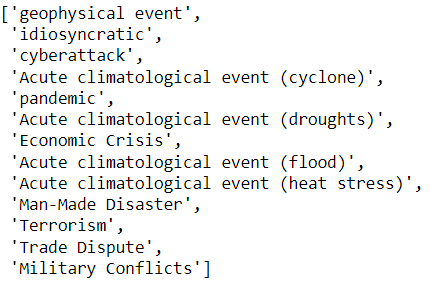

In [41]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/budget-2022-expected-deficit-3-billion-past-reserves-2506806')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df

SINGAPORE: Singapore’s Budget will continue to be expansionary for the financial year 2022, with an expected deficit of S$3 billion or 0.5 per cent of Singapore’s gross domestic product (GDP).
This is necessary to continue support for the economy, said Finance Minister Lawrence Wong on Friday (Feb 18) as he delivered the Budget 2022 statement.
Meanwhile for FY2021, the expansionary Budget is expected to clock an overall deficit of S$5 billion, or 0.9 per cent of GDP.
This, according to Mr Wong, is necessary for the country to “react nimbly and confidently to the evolving COVID-19 situation”.
President Halimah Yacob has given her in-principle support for this, Mr Wong told the House.
 
Classified Article Category: Economic Crisis


,Probability
Acute climatological event (cyclone),0.000289
Acute climatological event (droughts),0.000289
Acute climatological event (flood),0.000289
Acute climatological event (heat stress),0.000289
Economic Crisis,0.000289
Man-Made Disaster,0.000289
Military Conflicts,0.000289
Terrorism,0.000289
Trade Dispute,0.000289
cyberattack,0.000289


In [42]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/budget-2022-560-million-household-support-package-2506476')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df



SINGAPORE: A Household Support Package worth S$560 million will be rolled out to help Singaporeans with utility bills, children’s education and daily essentials, announced Finance Minister Lawrence Wong in his Budget speech on Friday (Feb 18).
The Household Support Package includes the distribution of another set of Community Development Councils (CDC) vouchers, the doubling of GST Voucher - U-Save rebates for the rest of the year, and a top-up in the relevant education account for each child under 21.
As part of the package, another set of S$100 CDC vouchers will be distributed this year to support all Singaporean households in their daily expenses.
The nationwide scheme was launched last December with up to 1.3 million Singaporean households each receiving S$100 in digital vouchers.
Households have until the end of 2022 to claim the vouchers.
 
Classified Article Category: Not related


,Probability
Acute climatological event (cyclone),0.23187
Acute climatological event (droughts),0.23187
Acute climatological event (flood),0.23187
Acute climatological event (heat stress),0.23187
Economic Crisis,0.23187
Man-Made Disaster,0.23187
Military Conflicts,0.23187
Terrorism,0.23187
Trade Dispute,0.23187
cyberattack,0.23187


In [43]:
from newspaper import Article

article = Article('https://www.straitstimes.com/multimedia/the-big-story-more-expensive-fish-vegetables-at-spore-wet-markets-ahead-of-cny')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df


Catch the latest news video reports on The Big Story, The Straits Times' weekday online news programme.
Prices of some popular fish, such as Chinese pomfret and red grouper, have spiked ahead of Chinese New Year.
Visiting six wet markets on Wednesday (Jan 26), ST found that some sellers are doubling their prices for these fish.
Vegetable prices also continued to creep up, as sellers said they are still coping with the aftermath of the Malaysia floods, as well as manpower shortages in farms there.
And despite bak kwa costing more as well, the higher prices have not deterred people from queuing at Lim Chee Guan's flagship store in Chinatown.
 
Classified Article Category: Acute climatological event (flood)


,Probability
Acute climatological event (cyclone),0.002827
Acute climatological event (droughts),0.002827
Acute climatological event (flood),0.002827
Acute climatological event (heat stress),0.002827
Economic Crisis,0.002827
Man-Made Disaster,0.002827
Military Conflicts,0.002827
Terrorism,0.002827
Trade Dispute,0.002827
cyberattack,0.002827


In [44]:
from newspaper import Article

article = Article('https://www.straitstimes.com/asia/se-asia/troubling-signs-of-myanmar-food-price-rises-since-coup-un-agency')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df

YANGON (REUTERS) - The UN food agency said on Tuesday (March 16) rising food and fuel prices in Myanmar since a Feb 1 military coup risk undermining the ability of poor families to feed themselves.
The cost of fuel had risen by 15 per cent nationwide since Feb 1, raising concern about further food price increases, it said.
"These rising food and fuel prices are compounded by the near paralysis of the banking sector, slowdowns in remittances, and widespread limits on cash availability," the WFP said.
The military defended its coup saying its complaints of fraud in a November election won by Ms Suu Kyi's party had been ignored.
Myanmar, once Asia's main rice basket, was among the region's poorest countries after the military seized power in a 1962 coup and imposed an autarchic "way to socialism".
 
Classified Article Category: Not related


,Probability
Acute climatological event (cyclone),0.249661
Acute climatological event (droughts),0.249661
Acute climatological event (flood),0.249661
Acute climatological event (heat stress),0.249661
Economic Crisis,0.249661
Man-Made Disaster,0.249661
Military Conflicts,0.249661
Terrorism,0.249661
Trade Dispute,0.249661
cyberattack,0.249661


In [45]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/europe/putin-calls-ukrainian-statehood-a-fiction-history-suggests-otherwise')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df

"Modern Ukraine was entirely and fully created by Russia, more specifically the Bolshevik, communist Russia," Mr Putin said.
As a misreading of history, it was extreme even by the standards of Mr Putin, a former KGB officer who has declared the Soviet Union's collapse the greatest geopolitical catastrophe of the 20th century.
But the happy brotherhood of nations that Mr Putin likes to paint, with Ukraine fitted snugly into the fabric of a greater Russia, is dubious.
The newly created Soviet government under Lenin that drew so much of Mr Putin's scorn on Monday would eventually crush the nascent independent Ukrainian state.
"For the past few decades, the West has been looking for fascism anywhere, but not where it was most," said Maria Tomak, an activist involved in supporting people from Crimea, a Ukrainian territory Mr Putin annexed in 2014.
 
Classified Article Category: Not related


,Probability
Acute climatological event (cyclone),0.222724
Acute climatological event (droughts),0.222724
Acute climatological event (flood),0.222724
Acute climatological event (heat stress),0.222724
Economic Crisis,0.222724
Man-Made Disaster,0.222724
Military Conflicts,0.222724
Terrorism,0.222724
Trade Dispute,0.222724
cyberattack,0.222724


In [46]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/europe/biden-says-us-allies-will-respond-to-unjustified-attack-by-russia-on-ukraine')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df



Mr Biden is expected to announce on Thursday further measures to be imposed on Russia by America and its allies.
“President Putin has chosen a path of bloodshed and destruction by launching this unprovoked attack on Ukraine,” Mr Johnson said in a tweet.
EU chiefs Ursula von der Leyen and Charles Michel said Russia will be held “accountable” for its attack on Ukraine.
“We strongly condemn Russia’s unjustified attack on Ukraine.
In these dark hours, our thoughts are with Ukraine and the innocent women, men and children as they face this unprovoked attack and fear for their lives,” they each wrote on Twitter.
 
Classified Article Category: Not related


,Probability
Acute climatological event (cyclone),0.243959
Acute climatological event (droughts),0.243959
Acute climatological event (flood),0.243959
Acute climatological event (heat stress),0.243959
Economic Crisis,0.243959
Man-Made Disaster,0.243959
Military Conflicts,0.243959
Terrorism,0.243959
Trade Dispute,0.243959
cyberattack,0.243959


In [47]:
from newspaper import Article

article = Article('https://www.straitstimes.com/business/property/tanglin-shopping-centre-sold-to-royal-golden-eagle-for-868m-10-per-cent-above-reserve-price')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array[0])

df = pd.DataFrame(data=probability_array[0] * 100, index=new_category , columns=["Probability"])

df




SINGAPORE - The landmark Tanglin Shopping Centre in the Orchard Road area has been sold in a collective sale for $868 million after three failed attempts.
The buyer – a developer held by Indonesian billionaire Sukanto Tanoto’s pulp, paper and palm oil giant Royal Golden Eagle (RGE) – paid $40 million above the guide price, and about 10 per cent over its $785 million reserve price, noted marketing agent Savills Singapore.
Hoo, owns a 300 sq ft shop and an 800 sq ft office unit in the complex.
The 2011 attempt had a reserve price of $1.25 billion that was not met.
Owners of retail units ranging from 300 sq ft to 500 sq ft stand to get between $1.5 million and $3.5 million, while owners of offices between 300 sq ft and 1,500 sq ft are in line for $900,000 to $4.5 million, he added.
 
Classified Article Category: Man-Made Disaster


,Probability
Acute climatological event (cyclone),0.056959
Acute climatological event (droughts),0.056959
Acute climatological event (flood),0.056959
Acute climatological event (heat stress),0.056959
Economic Crisis,0.056959
Man-Made Disaster,0.056959
Military Conflicts,0.056959
Terrorism,0.056959
Trade Dispute,0.056959
cyberattack,0.056959


# VADER Component (To be edited)

In [48]:
import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the lexicon
# nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [49]:
data = "CSV Data for Classifier/avalanche_straitstimes.csv"
sentiment_data = pd.read_csv(data)

sentiment_data = sentiment_data.drop(columns=[sentiment_data.columns[0],'location', 'news source(url)', 'keywords', 'class_name', 'new_class_name'], axis=1)
sentiment_data.head(3)

,date,news title,content summary
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...


In [50]:
sentiment_data["sentiment score"] = sentiment_data['content summary'].apply(lambda x: sent_analyzer.polarity_scores(x))
sentiment_data.head(3)

,date,news title,content summary,sentiment score
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"{'neg': 0.092, 'neu': 0.859, 'pos': 0.049, 'co..."
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...,"{'neg': 0.211, 'neu': 0.723, 'pos': 0.066, 'co..."
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...,"{'neg': 0.166, 'neu': 0.763, 'pos': 0.071, 'co..."


In [51]:
def get_compound_score(sentimentScore):
    return sentimentScore['compound']

def format_data(sentimentScore):
    
    if sentimentScore['compound'] >= 0.5:
        return 'positive'
    elif sentimentScore['compound'] <= -0.5:
        return 'negative'
    elif sentimentScore['compound'] > -0.5 or sentimentScore['compound'] < 0.5:
        return 'neutral'

# Apply the transformation
sentiment_data["compound score"] = sentiment_data['sentiment score'].apply(lambda x: get_compound_score(x))
sentiment_data["sentiment label"] = sentiment_data['sentiment score'].apply(lambda x: format_data(x))
sentiment_data

,date,news title,content summary,sentiment score,compound score,sentiment label
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"{'neg': 0.092, 'neu': 0.859, 'pos': 0.049, 'co...",-0.7506,negative
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...,"{'neg': 0.211, 'neu': 0.723, 'pos': 0.066, 'co...",-0.9712,negative
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...,"{'neg': 0.166, 'neu': 0.763, 'pos': 0.071, 'co...",-0.9285,negative
3,Feb-22,Himalayan avalanche traps Indian Army patrol t...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"{'neg': 0.031, 'neu': 0.851, 'pos': 0.118, 'co...",0.8225,positive
4,Feb-21,"4 skiers killed in avalanche in Utah, official...",SALT LAKE CITY (NYTIMES) - Four back-country s...,"{'neg': 0.153, 'neu': 0.824, 'pos': 0.023, 'co...",-0.9509,negative
...,...,...,...,...,...,...
511,May-15,Porters hired to deliver aid to Nepal quake vi...,KATHMANDU (AFP) - The United Nations World Foo...,"{'neg': 0.119, 'neu': 0.804, 'pos': 0.078, 'co...",-0.6249,negative
512,May-15,Nepal river blocked by landslide flowing again...,KATHMANDU (Reuters) - A river dammed up by a h...,"{'neg': 0.096, 'neu': 0.858, 'pos': 0.046, 'co...",-0.7650,negative
513,Apr-15,Nepal earthquake: Teen pulled from Nepal quake...,"KATHMANDU (REUTERS, AFP) - Rescuers pulled a 1...","{'neg': 0.162, 'neu': 0.679, 'pos': 0.159, 'co...",-0.3400,neutral
514,Apr-15,Nepal earthquake: Survivor found after 80-hour...,Thousands were killed when the earthquake brou...,"{'neg': 0.094, 'neu': 0.848, 'pos': 0.057, 'co...",-0.6249,negative
